In [50]:
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score



In [105]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



print (train.corr())

print (train.head(n=10))

print (test.head(n=10))

print (train.describe())

output=train["y"]


num_train=len(train)
id_test=test["ID"]





            ID         y       X10  X11       X12       X13       X14  \
ID    1.000000 -0.055108  0.001602  NaN  0.058988 -0.031917 -0.025438   
y    -0.055108  1.000000 -0.026985  NaN  0.089792  0.048276  0.193643   
X10   0.001602 -0.026985  1.000000  NaN -0.033084 -0.028806 -0.100474   
X11        NaN       NaN       NaN  NaN       NaN       NaN       NaN   
X12   0.058988  0.089792 -0.033084  NaN  1.000000  0.214825 -0.246513   
X13  -0.031917  0.048276 -0.028806  NaN  0.214825  1.000000 -0.083141   
X14  -0.025438  0.193643 -0.100474  NaN -0.246513 -0.083141  1.000000   
X15   0.002237  0.023116 -0.002532  NaN -0.006212 -0.005409 -0.018865   
X16  -0.036480  0.048946 -0.005944  NaN -0.014584 -0.012698 -0.044291   
X17  -0.038171 -0.159815 -0.010164  NaN -0.024937 -0.021713  0.012713   
X18  -0.027063 -0.001789 -0.010323  NaN -0.025327 -0.010525 -0.076916   
X19  -0.012762 -0.168895 -0.038610  NaN -0.094730 -0.082482 -0.287691   
X20   0.063216 -0.095148 -0.047393  NaN -0.116280 -

                ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.057971     0.428130     0.000475     0.002613     0.007603   
std       0.233716     0.494867     0.021796     0.051061     0.086872   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     

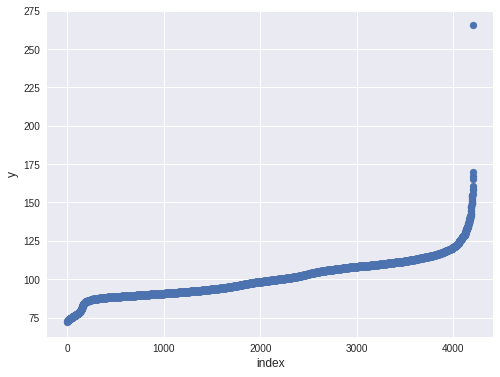

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

In [106]:
train=train.drop("y",axis=1)
train=train.drop("ID",axis=1)
test=test.drop("ID",axis=1)



df_all=pd.concat([train,test])

In [107]:
print (df_all.info())
df_all=df_all.drop('X11',axis=1)

print (df_all.isnull().sum())


df_all.fillna(df_all.median(), inplace=True)


cf=df_all.select_dtypes(include=['object']).columns


en=LabelEncoder()
for features in cf:
 df_all[features]=en.fit_transform(df_all[features])
print (df_all.info())

print (df_all.head(n=20))

def minmax(x):
    xmin=x.min()
    xmax=x.max()
    xnorm=(x-xmin)/(xmax-xmin)
    return xnorm
for feat in cf:
    df_all[feat]=minmax(df_all[feat])
    
print (df_all.head(n=10))

print (df_all.describe())

preferred=['X5','X0','X8','X314','X1','X118','X6','X47','X315','X2','X29','X127','X236','X339','X383','X3','X104','X115','X204','X261','X119']
df_all=df_all[preferred]


X_train = df_all[:num_train]
X_test = df_all[num_train:]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8418 entries, 0 to 4208
Columns: 376 entries, X0 to X385
dtypes: int64(368), object(8)
memory usage: 24.2+ MB
None
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8418 entries, 0 to 4208
Columns: 375 entries, X0 to X385
dtypes: int64(375)
memory usage: 24.1 MB
None
    X0  X1  X2  X3  X4  X5  X6  X8  X10  X12  ...   X375  X

In [108]:
print df_all.head

<bound method DataFrame.head of            X5        X0        X8  X314        X1  X118        X6  X47  X315  \
0     0.84375  0.711538  0.583333     0  0.884615     1  0.818182    0     0   
1     0.96875  0.711538  0.583333     0  0.807692     1  1.000000    0     0   
2     0.93750  0.461538  0.958333     0  0.923077     0  0.818182    0     0   
3     0.93750  0.461538  0.166667     0  0.807692     0  1.000000    0     0   
4     0.43750  0.461538  0.541667     0  0.884615     0  0.272727    0     0   
5     0.40625  0.884615  0.750000     0  0.115385     1  0.636364    0     0   
6     0.37500  0.211538  0.750000     0  0.730769     0  0.636364    0     0   
7     0.37500  0.788462  0.000000     0  0.500000     1  0.818182    0     0   
8     0.37500  0.942308  0.291667     1  0.769231     1  0.727273    0     0   
9     0.37500  0.692308  0.166667     1  0.115385     1  0.000000    0     0   
10    0.37500  0.653846  0.625000     1  0.730769     0  0.636364    0     0   
11    0.

In [109]:
from sklearn.cross_validation import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X_train,output,test_size=0.2,random_state=429)

In [110]:




from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import xgboost as xgb
xgb_params = {
    'n_trees': 1500, 
    'eta': 0.05,
    'max_depth':4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'seed':1423,
    'silent': 1
}

#dtr = xgb.DMatrix(X_train,output)
#dte = xgb.DMatrix(X_test)

dtr = xgb.DMatrix(X_tr,y_tr)
dte = xgb.DMatrix(X_te)

cv_result = xgb.cv(xgb_params, 
                   dtr, 
                   nfold=5,
                   num_boost_round=1000,
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False
                  )
num_boost_rounds = len(cv_result)
print(num_boost_rounds)
model = xgb.train(dict(xgb_params, silent=0), dtr, num_boost_round=num_boost_rounds)


pred = model.predict(dte)

r2=r2_score(y_te,pred)
mse=mean_squared_error(y_te,pred)

print("mean square error and r2 score of xgb is {},{}".format(mse,r2))



[0]	train-rmse:95.892	test-rmse:95.8913
[10]	train-rmse:57.8657	test-rmse:57.8647
[20]	train-rmse:35.2922	test-rmse:35.2912
[30]	train-rmse:22.1191	test-rmse:22.1204
[40]	train-rmse:14.7065	test-rmse:14.7366
[50]	train-rmse:10.8271	test-rmse:10.9125
[60]	train-rmse:8.99287	test-rmse:9.14171
[70]	train-rmse:8.19574	test-rmse:8.40896
[80]	train-rmse:7.85804	test-rmse:8.12932
[90]	train-rmse:7.7041	test-rmse:8.02887
[100]	train-rmse:7.61908	test-rmse:7.99534
[110]	train-rmse:7.56203	test-rmse:7.98856
[120]	train-rmse:7.51175	test-rmse:7.99499
[130]	train-rmse:7.46841	test-rmse:7.99439
[140]	train-rmse:7.425	test-rmse:8.00453
[150]	train-rmse:7.3868	test-rmse:8.01036
[160]	train-rmse:7.34764	test-rmse:8.01802
112
mean square error and r2 score of xgb is 90.0119682296,0.504413178585


In [5]:
result=pd.DataFrame()
result = pd.DataFrame({'ID': id_test, 'y': pred})
result.to_csv('top_super1.csv', index=False)


print (output.describe())
print (pd.DataFrame(pred).describe())


count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64
                 0
count  4209.000000
mean    100.778191
std       9.262413
min      77.008598
25%      94.022774
50%      95.169044
75%     111.285431
max     136.340607


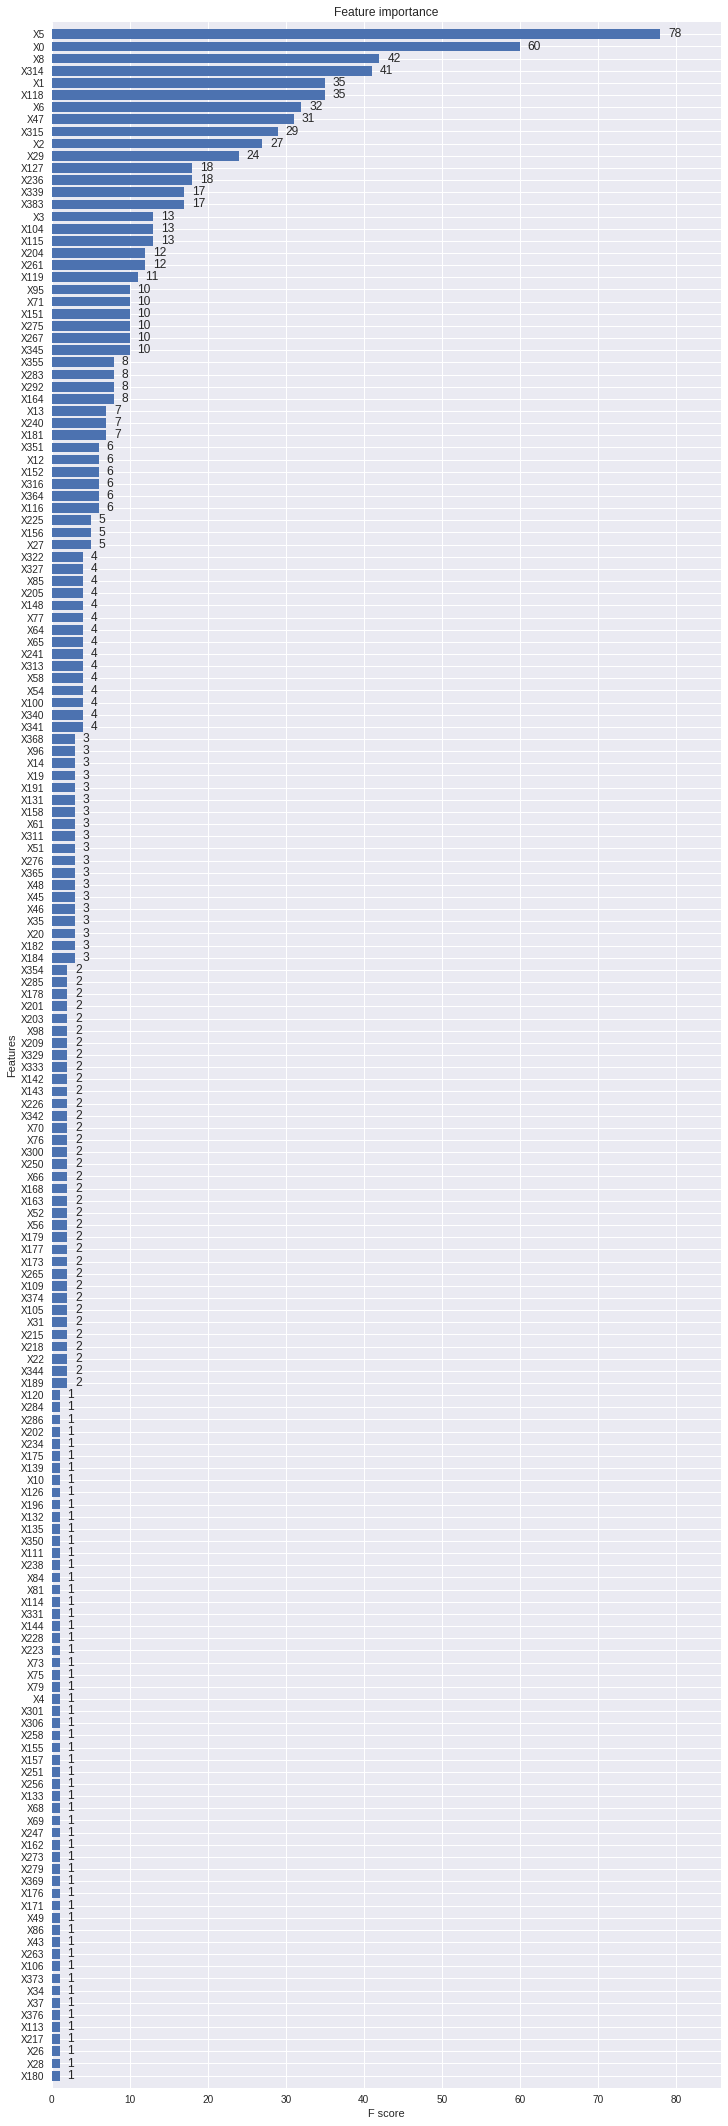

In [94]:
fig, ax = plt.subplots(figsize=(12,38))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()
